In [3]:
from arch import TARCH

ImportError: cannot import name 'TARCH' from 'arch' (/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arch/__init__.py)

In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from tqdm.autonotebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/rh/7rjcc_rs68n6wjb41vhqg3dh0000gn/T/ipykernel_75289/671031538.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
folder = r'/Users/kirill/Downloads/Новая папка'

In [3]:
#бух баланс
def balance(x):
    value = x['Unnamed: 3'][5]
    value = int(value.split(' ')[2])

    x = x.loc[(pd.isna(x['Unnamed: 1'])==False)&(x['Unnamed: 1']!='Код ')][:][3:].replace('-', 0)
    x.drop('Unnamed: 1', axis=1, inplace=True)
    x = x.reset_index(drop=True)

    x['Unnamed: 2'] = x['Unnamed: 2'].astype(float) * value
    x['Unnamed: 3'] = x['Unnamed: 3'].astype(float) * value
    x['Unnamed: 4'] = x['Unnamed: 4'].astype(float) * value

    pca = PCA(n_components=1)

    principalComponents = pca.fit_transform(x[['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']])

    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1'])
    return(principalDf)



#отчет о прибылях и убытках
def prof_and_loss(x):
    value = x['Unnamed: 3'][5]
    value = int(value.split(' ')[2])

    x = x.loc[(pd.isna(x['Unnamed: 1'])==False)&(x['Unnamed: 1']!='Код ')][:][3:].replace('-', 0)
    x.drop('Unnamed: 1', axis=1, inplace=True)

    x = x.reset_index(drop=True)
    x['Unnamed: 2'] = x['Unnamed: 2'].astype(float) * value
    x['Unnamed: 3'] = x['Unnamed: 3'].astype(float) * value

    pca = PCA(n_components=1)

    principalComponents = pca.fit_transform(x[['Unnamed: 2', 'Unnamed: 3']])

    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1'])
    return(principalDf)



#форма об изменении капитала
def cap_change(x):
    value = x['Unnamed: 3'][5]
    value = int(value.split(' ')[2])

    x = x.loc[(pd.isna(x['Unnamed: 1'])==False)&(x['Unnamed: 1']!='Код ')][:][3:].replace('-', 0)

    x.drop('Unnamed: 1', axis=1, inplace=True)
    x = x.reset_index(drop=True)
    x['Unnamed: 2'] = x['Unnamed: 2'].astype(float) * value
    x['Unnamed: 3'] = x['Unnamed: 3'].astype(float) * value
    x['Unnamed: 4'] = x['Unnamed: 4'].astype(float) * value
    x['Unnamed: 5'] = x['Unnamed: 5'].astype(float) * value
    x['Unnamed: 6'] = x['Unnamed: 6'].astype(float) * value
    x['Unnamed: 7'] = x['Unnamed: 7'].astype(float) * value

    pca = PCA(n_components=1)

    principalComponents = pca.fit_transform(x[['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',]])

    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1'])
    return(principalDf)

#форма о движении ден средств
def den_sr(x):
    
    value = x['Unnamed: 3'][5]
    value = int(value.split(' ')[2])

    x = x.loc[(pd.isna(x['Unnamed: 1'])==False)&(x['Unnamed: 1']!='Код ')][:][3:].replace('-', 0)

    x.drop('Unnamed: 1', axis=1, inplace=True)
    x = x.reset_index(drop=True)
    x['Unnamed: 2'] = x['Unnamed: 2'].astype(float) * value
    x['Unnamed: 3'] = x['Unnamed: 3'].astype(float) * value

    pca = PCA(n_components=1)

    principalComponents = pca.fit_transform(x[['Unnamed: 2', 'Unnamed: 3']])

    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1'])
    return(principalDf)

In [4]:
def get_data(file, count):
    
    name = pd.read_excel(folder + '/' + file)['Unnamed: 0'][0]

    x1 = balance(pd.read_excel(folder + '/' + file, sheet_name='Форма № 1 по ОКУД'))
    x2 = prof_and_loss(pd.read_excel(folder + '/' + file, sheet_name='Форма № 2 по ОКУД'))
    x3 = cap_change(pd.read_excel(folder + '/' + file, sheet_name='Форма № 3 по ОКУД'))
    x4 = den_sr(pd.read_excel(folder + '/' + file, sheet_name='Форма № 4 по ОКУД'))

    df = pd.concat([x1, x2, x3, x4]).reset_index(drop=True)

    df = df.rename(columns={'principal component 1':count})

    return(df, name)

In [5]:
dfs = []
names = []

for count, file in enumerate(os.listdir(r'/Users/kirill/Downloads/Новая папка')):
    
    if file != '.DS_Store':
        
        df, name = get_data(file=file, count=count)
        
        dfs.append(pd.DataFrame(df.T))
        names.append(name)

all_data = pd.DataFrame()

all_data = pd.concat(dfs)

In [18]:
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,cluster,names
0,-1.566715e+08,-1.566715e+08,-1.566715e+08,-1.566715e+08,6.079097e+08,-1.566715e+08,-1.566715e+08,-1.464565e+08,-1.566715e+08,6.181258e+08,...,-5.195806e+07,-5.195806e+07,-5.195806e+07,1.474267e+07,-6.383317e+07,-2.254414e+07,-3.425716e+07,-5.179597e+07,0,"ООО ""АРВАЛУС"""
1,-3.889529e+09,-3.891167e+09,-3.891167e+09,-3.891167e+09,7.527658e+09,-3.890428e+09,-2.665215e+09,-3.882834e+09,-1.185126e+09,1.147036e+10,...,-1.702896e+09,-3.519637e+08,-1.702896e+09,4.086605e+09,1.922567e+09,-6.344274e+08,2.971496e+09,-1.722436e+09,0,"ООО ""ЛВМ РУС"""
2,-1.883859e+09,-1.883862e+09,-1.883862e+09,-1.883862e+09,2.903415e+08,-1.883862e+09,-6.521864e+08,-1.733057e+09,-1.883862e+09,1.672824e+09,...,-3.879801e+08,7.945356e+08,-1.397354e+09,-2.664711e+09,-1.395357e+09,-1.396007e+09,-1.393700e+09,-1.397158e+09,0,"АО ""ОСК"""
3,-3.106750e+08,-3.106750e+08,-3.106750e+08,-3.106750e+08,-2.019090e+07,-3.106750e+08,-3.106750e+08,-2.811967e+08,-2.373670e+08,8.259536e+07,...,-3.913178e+08,2.748910e+08,-3.913178e+08,-2.442128e+08,-2.085635e+08,-3.345586e+08,-1.518043e+08,-3.913178e+08,0,"АО ""УМКК"""
4,-1.249147e+09,-1.249147e+09,-1.249147e+09,-1.249147e+09,1.930641e+09,-1.249147e+09,-1.249147e+09,-1.231896e+09,-1.249147e+09,1.947891e+09,...,-7.827754e+08,-7.827754e+08,1.078683e+09,-1.444789e+09,-9.165859e+08,-3.917457e+08,-5.218949e+08,-7.791140e+08,0,"ООО ""АСТОН КРАХМАЛО-ПРОДУКТЫ"""


  0%|          | 0/15 [00:00<?, ?it/s]

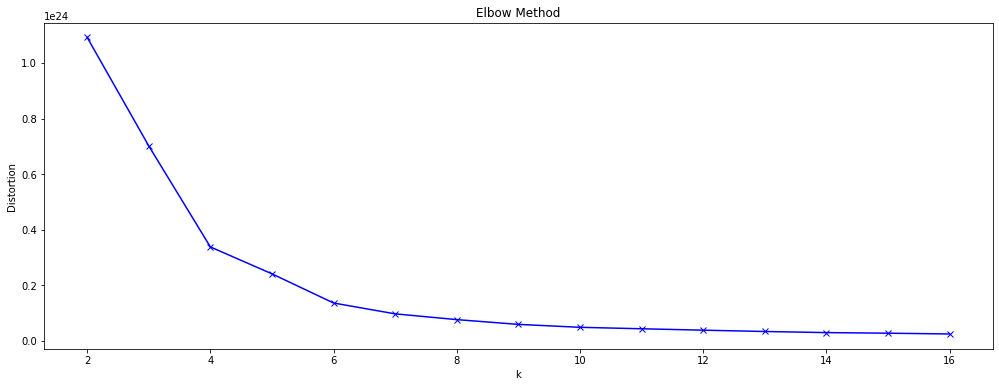

In [6]:
distortions = []
K = range(2,17)

for k in tqdm(K):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(all_data)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(17,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

In [7]:
#for data
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(all_data)

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(all_data)

principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1_el', 'principal component 2_el', 'principal component 3_el'])

principalDf['cluster_el'] = kmeanModel.labels_


#for centers
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(pd.DataFrame(kmeanModel.cluster_centers_))

principalDf1 = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

principalDf1['cluster'] = [0,1,2,3]

df = principalDf.join(principalDf1, on='cluster_el')
df['cluster'] = df['cluster'].replace([0,1,2,3], ['#DF2020', '#81DF20', '#2095DF', 'black'])
df['names'] = names

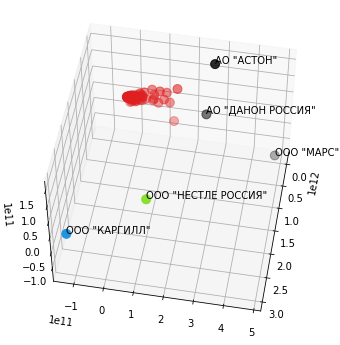

In [8]:
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')

#elements
ax.scatter(df['principal component 1_el'], 
           df['principal component 2_el'], 
           df['principal component 3_el'], 
           c=df['cluster'],
           s=80)

ax.view_init(50, 10)

for i in [1,2,3, 4,5,6]:
    for j in range(len(df.loc[df['cluster_el']==i]['names'])):
        ax.text(list(df.loc[df['cluster_el']==i]['principal component 1_el'])[j]
                , list(df.loc[df['cluster_el']==i]['principal component 2_el'])[j]
                , list(df.loc[df['cluster_el']==i]['principal component 3_el'])[j]
               , list(df.loc[df['cluster_el']==i]['names'])[j]
               
               )



<AxesSubplot:>

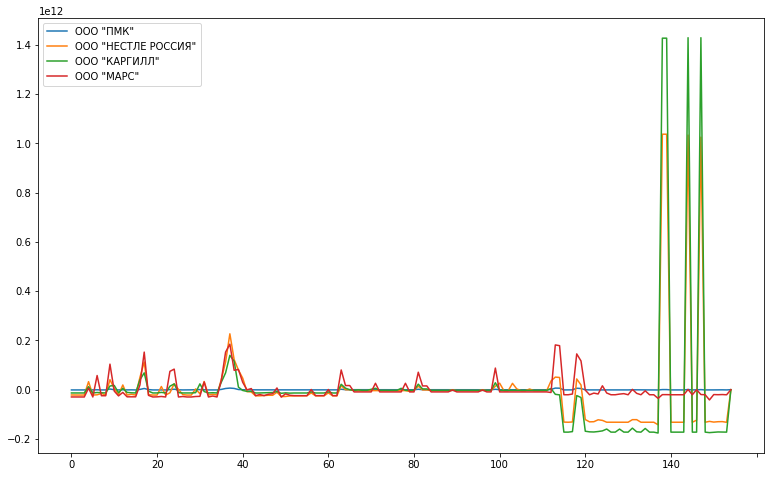

In [19]:
all_data['cluster'] = kmeanModel.labels_
all_data['names'] = names

samples = [all_data.loc[all_data['cluster']==0].sample(),
           all_data.loc[all_data['cluster']==1].sample(),
           all_data.loc[all_data['cluster']==2].sample(),
           all_data.loc[all_data['cluster']==3].sample()]

companies = pd.concat(samples).iloc[:,-1]
samples = pd.concat(samples).iloc[:,:-1]
samples = samples.T
samples = samples.rename(columns={list(samples.columns)[0]: list(companies)[0],
                                 list(samples.columns)[1]: list(companies)[1],
                                 list(samples.columns)[2]: list(companies)[2],
                                 list(samples.columns)[3]: list(companies)[3]})
samples.plot(figsize=(13,8))

<AxesSubplot:>

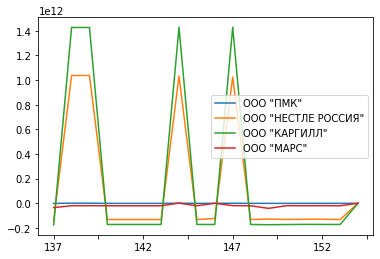

In [22]:
samples.tail(18).plot()